<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E6%B1%BA%E7%AD%96%E6%A8%B9%E9%9B%86%E6%88%90%E6%A8%A1%E5%9E%8B/100%E6%A3%B5%E6%A8%B9%E7%B5%84%E6%88%90%E7%9A%84%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 在乳癌資料集上應用由 100 棵樹組成的隨機森林：

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.972


隨機森林為我們提供了 97% 的準確率，比線性模型或單一決策樹更好，而且無需調整任何參數。我們可以調整 max_features 設置，或像對單一決策樹那樣應用預修剪(pre-pruning)。然而，隨機森林的預設參數通常已經運行得相當好。

與決策樹類似，隨機森林提供特徵重要性，它是透過聚合森林中樹的特徵重要性來計算的。通常，隨機森林提供的特徵重要性比單棵樹提供的特徵重要性更可靠。

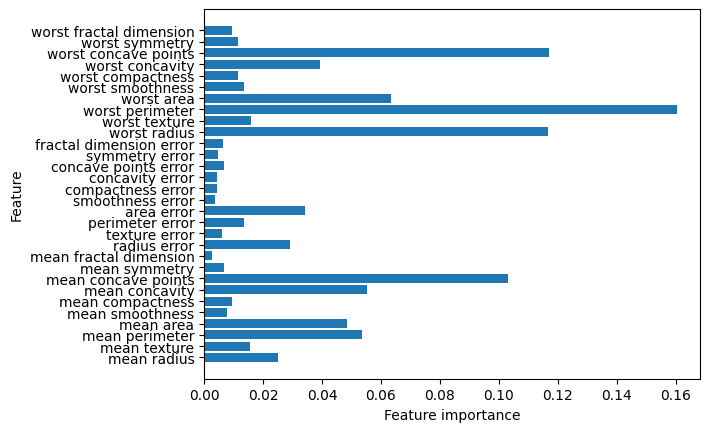

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()